In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загружаем данные из файла works

In [185]:
data = pd.read_csv("works.csv")
data

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
...,...,...,...,...,...,...,...,...
32678,15000,NaN,NaN,NaN,Женский,2021-06-23,NaN,NaN
32679,13000,Среднее,уборщица,NaN,Женский,2021-07-29,NaN,NaN
32680,16000,Среднее профессиональное,кочегар машинист котельной,NaN,Мужской,2021-11-11,NaN,NaN
32681,35000,Высшее,NaN,NaN,Мужской,2020-04-21,NaN,NaN


# 1. Узнать общее количество записей в датасете

Узнаем количество записей датафрейма можно несколькими способами

In [186]:
len(data)

32683

Общее количество элементов, проверяем через функцию size

In [187]:
data.size

261464

# 2. Узнать количество мужчин и женщин в датасете

Узнать количество мужчин и женщин в датасете можно применив функцию value_counts к столбцу "gender"

In [188]:
data['gender'].value_counts()

Женский    17910
Мужской    13386
Name: gender, dtype: int64

Применив аргумент normalize=True можем вычислить количество мужчин и женщин в процентом отношении

In [189]:
data['gender'].value_counts(normalize=True)

Женский    0.572278
Мужской    0.427722
Name: gender, dtype: float64

# 3. Узнать сколько значений в столбце skills не NAN

Узнать сколько значений в столбце skills не NaN через функцию info

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32683 entries, 0 to 32682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   salary         32683 non-null  int64 
 1   educationType  24750 non-null  object
 2   jobTitle       20259 non-null  object
 3   qualification  12176 non-null  object
 4   gender         31296 non-null  object
 5   dateModify     32682 non-null  object
 6   skills         8972 non-null   object
 7   otherInfo      2316 non-null   object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


In [191]:
data['skills'].notnull().sum()

8972

In [192]:
data['skills'].notnull().values.sum()

8972

# 4. Получить все заполненные скиллы

Получим все заполненные скилы с помощью фильтрации по столбцу

In [193]:
data[data['skills'].notna()]['skills']

0        <p>Аналитическое&nbsp;мышление,&nbsp;<span cla...
5        Ответственная,пунктуальная,дисциплинированная ...
10                         <p>Коммуникабельность&nbsp;</p>
13                         <p>Ответственность в работе</p>
21       <p>Усидчивость, умение удерживать в памяти нуж...
                               ...                        
32665    <p>Отвественность</p><p>Исполнительность</p><p...
32668    <p>Высокая работоспособность, нацеленность на ...
32672                                <p>исполнительный</p>
32674    <p>Нацелен на результат. Считаю себя командным...
32675                                 <p>трудоспособен</p>
Name: skills, Length: 8972, dtype: object

# 5. Вывести зарплату только у тех, у которых в скиллах есть Python (Питон)

Получим все строки в которых присутствутет слово python или питон. Для этого при получении троки переведем все 
символы в нижний регистр

In [194]:
df = data.skills.dropna().str.lower().str.contains('python|питон')

In [195]:
data[data.skills.notna()][df]['salary']

230      35000
334      20000
2394     35000
8096     15000
9014     25000
9667     90000
20930    30000
22530    50000
28286    23000
30430    23000
Name: salary, dtype: int64

# 6. Построить перцентили по заработной плате у мужчин и женщин

Для вычисления перцентилей получим одномерный массив распределения от 0,1 до 1. 

In [196]:
percent_linspace = np.linspace(.1, 1, 10)
percent_linspace

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [197]:
male_salary = data.query('gender == "Мужской"').quantile(percent_linspace)
male_salary

,salary
0.1,15000.0
0.2,20000.0
0.3,25000.0
0.4,30000.0
0.5,30000.0
0.6,35000.0
0.7,40000.0
0.8,50000.0
0.9,60000.0
1.0,1000000.0


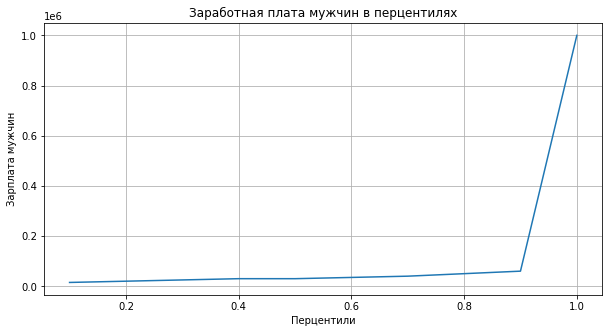

In [198]:
plt.figure(figsize=(10, 5)) 
plt.title('Заработная плата мужчин в перцентилях') 
plt.xlabel('Перцентили') 
plt.ylabel('Зарплата мужчин') 
plt.grid() 

plt.plot(male_salary)  
plt.show()

In [199]:
female_salary = data.query('gender == "Женский"').quantile(percent_linspace)
female_salary

,salary
0.1,15000.0
0.2,18000.0
0.3,20000.0
0.4,22000.0
0.5,25000.0
0.6,30000.0
0.7,30000.0
0.8,35000.0
0.9,47000.0
1.0,900000.0


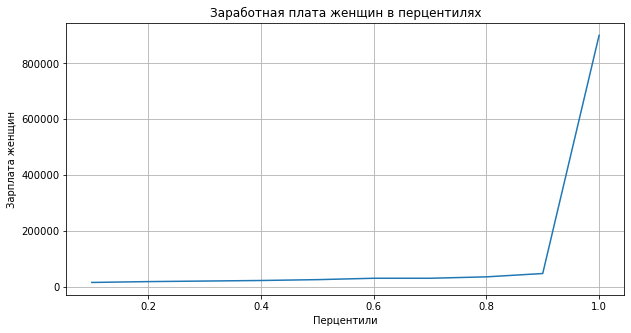

In [200]:
plt.figure(figsize=(10, 5)) 
plt.title('Заработная плата женщин в перцентилях') 
plt.xlabel('Перцентили') 
plt.ylabel('Зарплата женщин') 
plt.grid() 

plt.plot(female_salary)  
plt.show()

# 7. Построить графики распределения по заработной плате мужчин и женщин в зависимости от высшего образования

In [201]:
male_salary = data.groupby('educationType').agg('mean').reset_index()
male_salary

,educationType,salary
0,Высшее,38536.860696
1,Незаконченное высшее,36036.267699
2,Среднее,28511.660356
3,Среднее профессиональное,29848.650757


In [202]:
female_salary = data.query('gender == "Женский"').groupby('educationType').agg('mean').reset_index()
female_salary

,educationType,salary
0,Высшее,33826.008009
1,Незаконченное высшее,29171.382643
2,Среднее,24958.723963
3,Среднее профессиональное,25834.460409


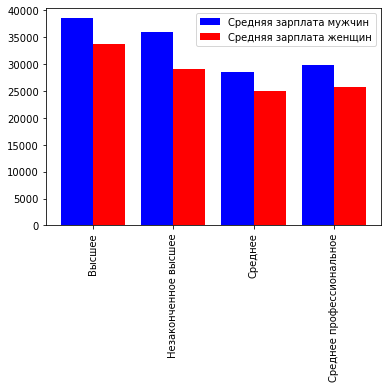

In [203]:
education = male_salary['educationType'].values
male_salaries = male_salary['salary'].values
female_salaries = female_salary['salary'].values

index = np.arange(len(education))

bw = 0.4
plt.bar(index-bw/2, male_salaries, bw, color='blue', label='Средняя зарплата мужчин')
plt.bar(index+bw/2, female_salaries, bw, color='red', label='Средняя зарплата женщин')
plt.xticks(index, education, rotation=90)
plt.legend()
plt.show()

### Построение графика распределения заработной платы для мужчин


Для начала отсортируем датафрейм. Оставим строки в которых у мужчин есть высшее образование

In [204]:
male_height = data.query('gender == "Мужской" and educationType == "Высшее"')
male_height

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
10,100000,Высшее,Начальник участка,NaN,Мужской,2021-04-01,<p>Коммуникабельность&nbsp;</p>,NaN
16,100000,Высшее,Технический директор,Экономист,Мужской,2021-04-01,NaN,NaN
28,50000,Высшее,Монтажник электрических подьемников,NaN,Мужской,2021-04-01,<p>Знание программного обеспечения от ведущих ...,NaN
...,...,...,...,...,...,...,...,...
32654,50000,Высшее,"экономист 8 разряда в подразделение ""Сектор по...",инженер-экономист,Мужской,2021-01-26,<p>инициативность;</p><p>внимательность;</p><p...,"<p>Знание-Бухгалтерский учет, управленческий у..."
32659,45000,Высшее,NaN,Инженер по организации и управлением на морско...,Мужской,2020-06-26,NaN,NaN
32663,40000,Высшее,Слесарь по ремонту подвижного состава 2-3 разряда,Техник,Мужской,2021-11-17,"<p>Командообразование, лидерство, опыт работы ...",NaN
32668,40000,Высшее,заместитель начальника юридического отдела,юрист,Мужской,2021-03-24,"<p>Высокая работоспособность, нацеленность на ...",NaN


### Распределение зарплат для мужчин с высшим образованием


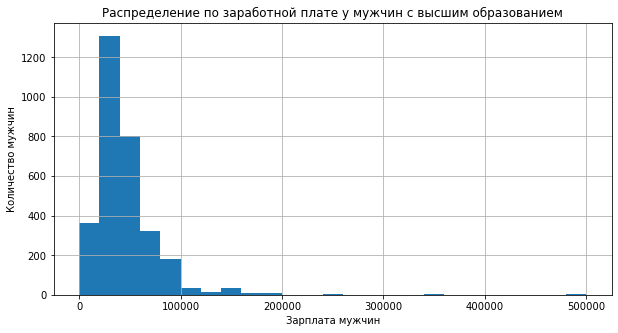

In [205]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по заработной плате у мужчин с высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(male_height['salary'], 
         bins=25) 
plt.show()

In [206]:
male_without_height = data.query('gender == "Мужской" and educationType == "Незаконченное высшее"')
male_without_height

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
76,50000,Незаконченное высшее,менеджер по продажам,NaN,Мужской,2021-09-06,"<p>Внимательность, ответственность, обучаемост...",NaN
193,50000,Незаконченное высшее,Старший специалист участка учета ТМЦ,NaN,Мужской,2021-04-06,NaN,NaN
202,50000,Незаконченное высшее,Мастер погрузки лесоматериала,NaN,Мужской,2021-05-20,<ul><li>умение работать самостоятельно;</li><l...,NaN
203,30000,Незаконченное высшее,Военнослужащий,NaN,Мужской,2021-04-06,NaN,NaN
292,100000,Незаконченное высшее,менеджер,NaN,Мужской,2021-10-19,NaN,NaN
...,...,...,...,...,...,...,...,...
32396,50000,Незаконченное высшее,NaN,NaN,Мужской,2020-11-08,NaN,NaN
32490,100000,Незаконченное высшее,Начальник участка,Бакалавр,Мужской,2019-05-16,"<p>Многозадачность, Контроль исполнения решени...",NaN
32602,25000,Незаконченное высшее,Продавец-кавист/бармен,NaN,Мужской,2021-10-09,"<p>Стрессоустойчивость, коммуникабельность,&nb...",NaN
32622,15000,Незаконченное высшее,Экспедитор-грузчик,NaN,Мужской,2020-06-16,<p>Работа с компьютером</p>,NaN


 ### Распределение зарплат для мужчин с неоконченным высшим образованием
 

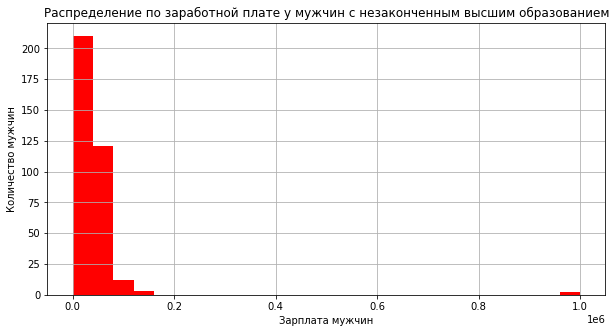

In [207]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(male_without_height['salary'], 
         color = 'r',
         bins=25) 
plt.show()

In [208]:
male_average = data.query('gender == "Мужской" and educationType == "Среднее"')
male_average

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
12,25000,Среднее,NaN,NaN,Мужской,2021-04-01,NaN,NaN
24,100000,Среднее,Машинист буровой установки,NaN,Мужской,2021-04-01,"<p>Коммуникабельность, пунктуальность</p>",NaN
51,15000,Среднее,NaN,NaN,Мужской,2021-04-01,NaN,NaN
88,95000,Среднее,NaN,Лесное хозяйство,Мужской,2021-04-01,NaN,NaN
89,20000,Среднее,менеджер по погрузке и транспортировке товара,NaN,Мужской,2021-04-10,NaN,NaN
...,...,...,...,...,...,...,...,...
32649,24000,Среднее,NaN,водитель,Мужской,2021-04-11,NaN,NaN
32651,25000,Среднее,Водитель,NaN,Мужской,2021-03-18,NaN,NaN
32658,20000,Среднее,NaN,NaN,Мужской,2021-05-12,NaN,NaN
32671,20467,Среднее,контролер-стажёр,NaN,Мужской,2021-06-08,NaN,NaN


### Распределение зарплат для мужчин со средним образованием

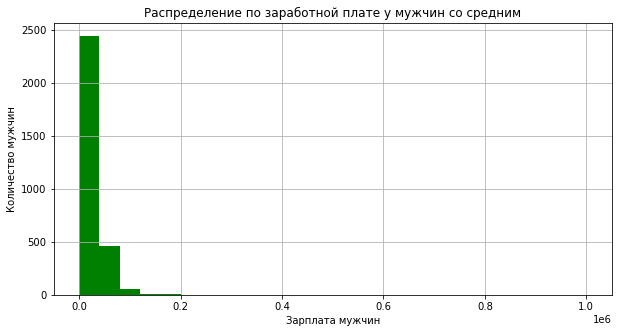

In [209]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин со средним') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(male_average['salary'],
         color ='green',
         bins=25) 
plt.show()

In [210]:
male_average_pr = data.query('gender == "Мужской" and educationType == "Среднее профессиональное"')
male_average_pr

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
9,20000,Среднее профессиональное,Рядовой колхозник,NaN,Мужской,2021-11-05,NaN,NaN
17,35000,Среднее профессиональное,Рабочий по комплексно му обслуживанию и ремонт...,Техник,Мужской,2021-04-01,NaN,NaN
23,30000,Среднее профессиональное,Матрос,NaN,Мужской,2021-04-01,NaN,NaN
27,70000,Среднее профессиональное,3-й механик,техник-судомеханик,Мужской,2021-04-01,NaN,NaN
29,11200,Среднее профессиональное,NaN,NaN,Мужской,2021-04-01,NaN,NaN
...,...,...,...,...,...,...,...,...
32618,45000,Среднее профессиональное,проходчик 5 разряда на подземном участке,NaN,Мужской,2021-05-19,NaN,NaN
32667,18000,Среднее профессиональное,NaN,NaN,Мужской,2021-10-27,NaN,NaN
32674,80000,Среднее профессиональное,Руководитель группы логистики,NaN,Мужской,2021-05-07,<p>Нацелен на результат. Считаю себя командным...,NaN
32675,40000,Среднее профессиональное,NaN,повар,Мужской,2021-11-24,<p>трудоспособен</p>,NaN


### Распределение зарплат для мужчин со среднее профессиональным образованием

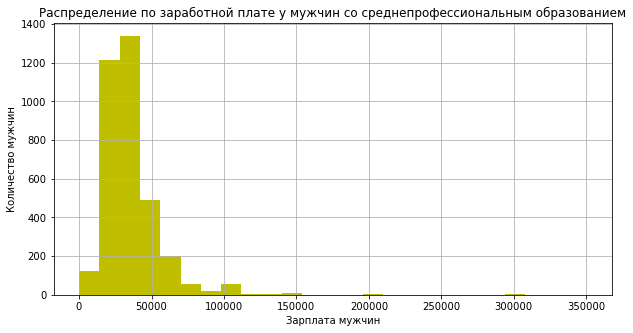

In [211]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин со среднепрофессиональным образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(male_average_pr['salary'], 
         color = 'y',
         bins=25) 
plt.show()

### Построение графиков распределения заработной платы для женщин

In [212]:
female_height = data.query('gender == "Женский" and educationType == "Высшее"')
female_height

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
8,40000,Высшее,Социальный работник,Преподователь дошкольной педагогики и психологии,Женский,2021-10-05,NaN,NaN
19,40000,Высшее,"бухгалтер, экономист",Экономист-организатор с.-х. производства,Женский,2021-07-02,NaN,NaN
21,30000,Высшее,Специалист 1 разряда,Магистр,Женский,2021-09-04,"<p>Усидчивость, умение удерживать в памяти нуж...",NaN
22,25000,Высшее,Начальник отдела социальных выплат,Экономика и менеджмент в сфере управления перс...,Женский,2021-09-29,"<p>Владение&nbsp;ПК:&nbsp;MsOffice,&nbsp;1С:ЗУ...",NaN
31,25000,Высшее,Офис-менеджер,Бакалавр,Женский,2021-10-01,"<p>Коммуникабельность, находить индивидуальный...",NaN
...,...,...,...,...,...,...,...,...
32640,50000,Высшее,NaN,Учитель русского языка и литературы,Женский,2021-05-20,"<p><em></em>Активная, обучаемая</p>",NaN
32652,60000,Высшее,Руководитель группы,бакалавр,Женский,2021-01-29,NaN,NaN
32655,12300,Высшее,учитель,филолог-преподаватель русского языка и литерат...,Женский,2021-02-09,NaN,NaN
32656,30000,Высшее,Менеджер,Экономист,Женский,2020-01-28,"<p>Исполнительная, &nbsp;коммуникабельная&nbsp...",NaN


### Распределение зарплат для женщин с высшим образованием

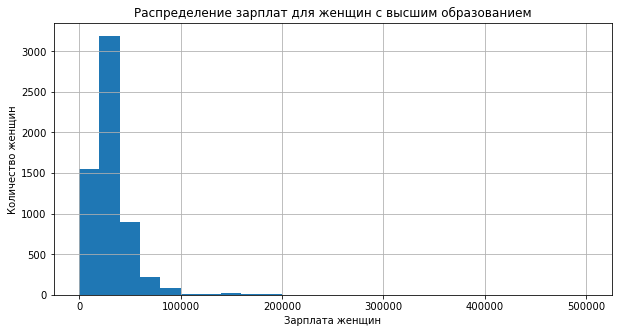

In [213]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение зарплат для женщин с высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(female_height['salary'], 
         bins=25) 
plt.show()

In [214]:
female_without_height = data.query('gender == "Женский" and educationType == "Незаконченное высшее"')
female_without_height

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
45,18000,Незаконченное высшее,"техник-геофизик, геофизик",горный инженер,Женский,2021-08-16,NaN,NaN
114,30000,Незаконченное высшее,Юрисконсульт,NaN,Женский,2021-04-01,NaN,NaN
115,20000,Незаконченное высшее,Делопроизводитель,NaN,Женский,2021-10-05,<p>Опытный пользователь ПК. Администрирование....,NaN
261,30,Незаконченное высшее,Продавец-консультант,NaN,Женский,2021-11-08,NaN,NaN
518,35000,Незаконченное высшее,Мастер-переплетчик,NaN,Женский,2021-08-16,"<p>Уверенный пользователь: MS Office (Word, Ex...",<p>Стажировка&nbsp; в Федеральной службе судеб...
...,...,...,...,...,...,...,...,...
32523,15000,Незаконченное высшее,Менеджер по работе с клиентами,NaN,Женский,2021-03-09,<p>Уверенный пользователь ПК; свободное владен...,NaN
32598,60000,Незаконченное высшее,Менеджер по продажам,NaN,Женский,2021-03-31,NaN,NaN
32605,20000,Незаконченное высшее,продаец-консультант,Бакалавр,Женский,2021-09-09,NaN,NaN
32657,40000,Незаконченное высшее,Официант,NaN,Женский,2021-05-20,"<p>Уверенный пользователь ПК: MS Office, Владе...",NaN


### Распределение по заработной плате у женщин с незокноченным высшим образованием

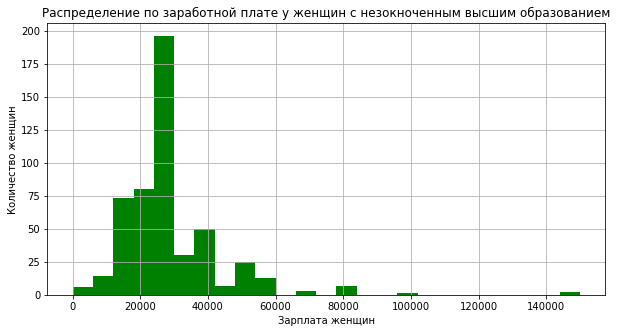

In [215]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незокноченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(female_without_height['salary'], 
         color = 'green',
         bins=25) 
plt.show()

In [216]:
female_average = data.query('gender == "Женский" and educationType == "Среднее"')
female_average

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
6,45000,Среднее,представитель бизнес зала,повар-кондитер,Женский,2021-10-20,NaN,NaN
26,20000,Среднее,NaN,NaN,Женский,2021-04-01,NaN,NaN
34,20000,Среднее,Повар,NaN,Женский,2021-05-14,NaN,NaN
61,25000,Среднее,NaN,NaN,Женский,2021-05-16,<p>профессионал</p>,NaN
110,10000,Среднее,NaN,NaN,Женский,2021-04-01,<p>Вредных привычек не имею.Умение работать в ...,<p>По запросу предъявлю рекомендации.</p>
...,...,...,...,...,...,...,...,...
32638,20000,Среднее,санитарка Родильного отделения,NaN,Женский,2021-07-26,NaN,NaN
32653,35000,Среднее,старшая горничная,NaN,Женский,2021-05-27,NaN,NaN
32664,18000,Среднее,Бухгалтер консультант,NaN,Женский,2021-09-23,NaN,NaN
32669,40000,Среднее,NaN,NaN,Женский,2021-07-08,NaN,NaN


### Распределение по заработной плате у женщин с  средним образованием

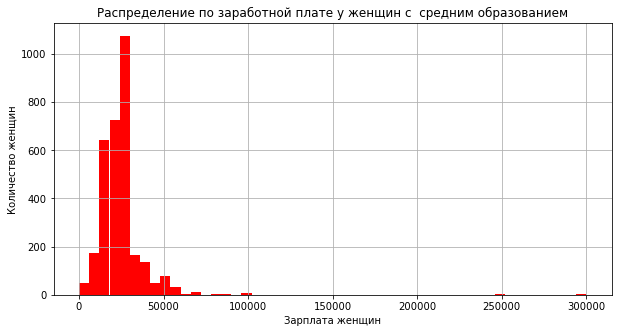

In [217]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с  средним образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(female_average['salary'], 
         color = 'r',
         bins=25) 
plt.show()

In [218]:
female_average_pr = data.query('gender == "Женский" and educationType == "Среднее профессиональное"')
female_average_pr

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
13,20000,Среднее профессиональное,Медсестра,Фельдшер,Женский,2021-04-01,<p>Ответственность в работе</p>,"<p>Провожу время в семье, люблю велоспорт, при..."
15,35000,Среднее профессиональное,Администратор кассир,NaN,Женский,2021-06-17,NaN,NaN
30,40000,Среднее профессиональное,Билетный мобильный кассир,"оператор швейного оборудования, швея 2 разряда",Женский,2021-05-18,"<p>Ответственная , комунникабельная , готовая ...",NaN
35,35000,Среднее профессиональное,консультант по банковским продуктам,банковское дело,Женский,2021-11-12,NaN,NaN
...,...,...,...,...,...,...,...,...
32633,30000,Среднее профессиональное,Упаковщица,Швея первого разряда,Женский,2021-03-31,NaN,NaN
32634,20000,Среднее профессиональное,Бухгалтер,NaN,Женский,2021-09-07,NaN,NaN
32636,18000,Среднее профессиональное,NaN,Учитель начальных классов,Женский,2021-04-11,NaN,NaN
32644,20000,Среднее профессиональное,NaN,Фармацевт,Женский,2021-08-26,"<p>Исполнительность, аккуратность, пунктуально...",NaN


### Распределение по заработной плате у женщин с среднее профессиональным образованием

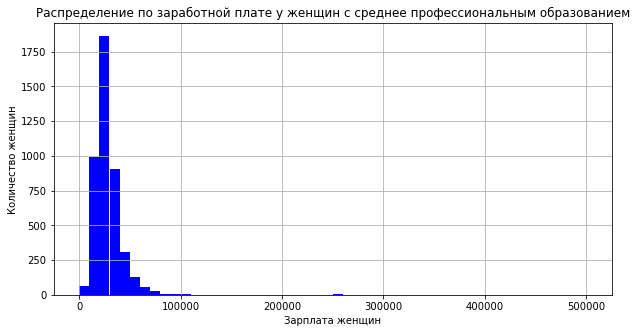

In [219]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с среднее профессиональным образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(female_average_pr['salary'], 
         color = 'b',
         bins=25) 
plt.show()

# 8. Очистить и визуализировать данные по профессии инженер и должности менеджер.

Очистим столбцы jobTitle и qualification от NaN значений, путем удаление строк.

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32683 entries, 0 to 32682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   salary         32683 non-null  int64 
 1   educationType  24750 non-null  object
 2   jobTitle       20259 non-null  object
 3   qualification  12176 non-null  object
 4   gender         31296 non-null  object
 5   dateModify     32682 non-null  object
 6   skills         8972 non-null   object
 7   otherInfo      2316 non-null   object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


In [221]:
data.shape

(32683, 8)

In [222]:
data.dropna(subset=["jobTitle", "qualification"], inplace=True)


In [223]:
data.shape

(10130, 8)

В итоге в осталось 10130 значений

Далее найдем все случаи в которых значения дублируются и удалим их

In [224]:
df = data.drop_duplicates(["jobTitle", "qualification"],keep='last')

In [225]:
df.shape

(9072, 8)

Мы очистили датафрейм от полных дубликатов по двум столбцам
Теперь найдем дубликаты по нескольким словам

In [226]:
def match_words(col1, col2):
    list1 = col1.split()
    for word in list1:
        if word in col2:
            return True
    return False

In [227]:

count = 0
for (col1, col2) in zip(df["jobTitle"], df["qualification"]):
    if match(col1, col2) or match_words(col2, col1):
        count += 1

df.shape[0] - count

7280

У 7280 человек профессия и должность не совпадают

# Топ 5 профессий и их графики

### менеджеры

In [228]:
work_managers = df[df["jobTitle"].str.contains("менедж")]
work_managers['qualification'].value_counts().head(5)

Экономист    24
Менеджер     18
экономист    17
бакалавр     16
Бакалавр     14
Name: qualification, dtype: int64

### инженеры

In [229]:
work_engineers = df[df["qualification"].str.contains("инженер")]
work_engineers['jobTitle'].value_counts().head(5)

Директор           7
инженер            6
Главный инженер    6
Инженер            6
директор           4
Name: jobTitle, dtype: int64

In [230]:
managers_to_list = work_managers['qualification'].value_counts().head(5)
engineers_to_list = work_engineers['jobTitle'].value_counts().head(5)

### Топ 5 для менеджеров

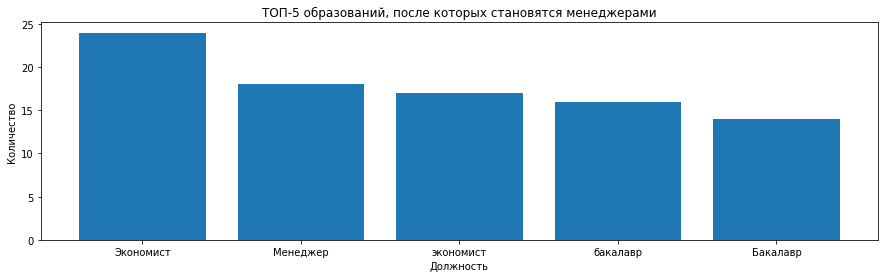

In [231]:
input_names = managers_to_list.index.tolist()
input_values = managers_to_list.tolist()

fig = plt.figure()
fig.set_figwidth(15)
plt.bar(input_names, input_values)
plt.title('ТОП-5 образований, после которых становятся менеджерами') 
plt.xlabel("Должность") 
plt.ylabel('Количество') 

plt.show()



### Топ 5 для инженеров

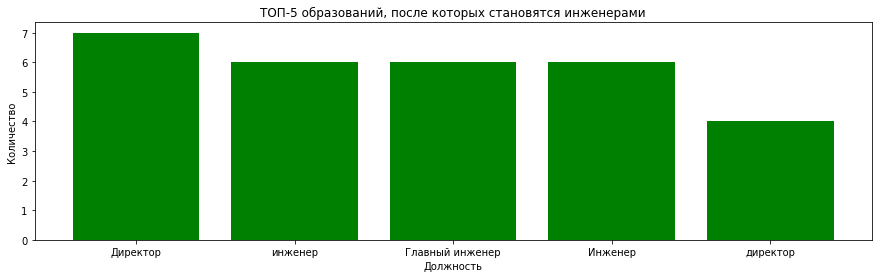

In [232]:
input_names = engineers_to_list.index.tolist()
input_values = engineers_to_list.tolist()

fig = plt.figure()
fig.set_figwidth(15)
plt.bar(input_names, input_values, color = 'green')
plt.title('ТОП-5 образований, после которых становятся инженерами') 
plt.xlabel('Должность') 
plt.ylabel('Количество') 

plt.show()